In [1]:
#IMPORTS
%run Functions.ipynb
%run ../datuslib.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# CARGO LOS FEATURES

In [2]:
to_predict=pd.read_csv('to_predict.csv')
to_predict=to_predict*1
print (to_predict.shape)
to_predict.head()

(3263, 204)


,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,key_bit0,key_bit1,key_bit2,...,Tiene_deaths,Tiene_climate,Tiene_plague,Tiene_disappearance,Tiene_missing,Tiene_floods,Tiene_delug,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,0.121429,6,6,0,4.833333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.228571,9,9,0,6.222222,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.342857,19,19,0,4.105263,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.142857,4,4,0,9.250000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.160714,8,8,0,4.750000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train=pd.read_csv('x_train.csv')
x_train=x_train*1
print (x_train.shape)
x_train.head()

(5709, 204)


,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,key_bit0,key_bit1,key_bit2,...,Tiene_deaths,Tiene_climate,Tiene_plague,Tiene_disappearance,Tiene_missing,Tiene_floods,Tiene_delug,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,0.485714,22,21,0,5.227273,0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.457143,17,17,1,6.588235,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.489286,29,29,0,3.758621,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0.189286,12,11,0,3.500000,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.189286,6,6,0,8.000000,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
x_test=pd.read_csv('x_test.csv')
x_test=x_test*1
print (x_test.shape)
x_test.head()

(1904, 204)


,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,key_bit0,key_bit1,key_bit2,...,Tiene_deaths,Tiene_climate,Tiene_plague,Tiene_disappearance,Tiene_missing,Tiene_floods,Tiene_delug,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,0.235714,11,11,0,5.090909,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.425000,21,20,0,4.714286,1,4,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,0.446429,15,15,1,7.400000,0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.407143,21,20,0,4.476190,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.375000,17,17,0,5.235294,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
y_train=pd.read_csv('y_train.csv')
y_train=y_train.target
print (y_train.shape)
y_train.head()

(5709,)


0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [6]:
y_test=pd.read_csv('y_test.csv')
y_test=y_test.target
print (y_test.shape)
y_test.head()

(1904,)


0    1
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [7]:
ids=pd.read_csv('ids.csv')
ids=ids.id
print (ids.shape)
ids.head()

(3263,)


0     0
1     2
2     3
3     9
4    11
Name: id, dtype: int64

# ESCALAMOS LOS VALORES PARA QUE LOS MISMOS ENTEN DENTRO DEL MISMO RANGO 

In [8]:
scaler = MinMaxScaler()



x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# COMIENZO CON EL ALGORITMO

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(x_train, y_train)

evaluate(dt, x_train,y_train, x_test, y_test)

Entrenamiento: 99.5095%
Testeo: 96.3761%.
F1 Score:  0.9637605042016807
F1 Score default:  0.9572225666460012


In [10]:
y_pred=dt.predict(to_predict)
comprobar(y_pred)

F1 Score:  0.5733987128409439
F1 Score default:  0.3074626865671642


# TUNEO EL MODELO

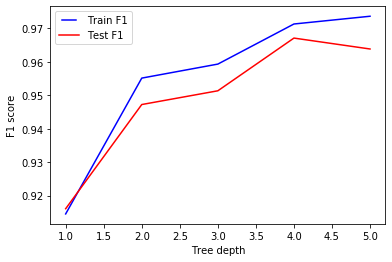

In [11]:
max_depths = np.linspace(1, 5, 5, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   score_train = f1_score(y_train, train_pred)
   
   # Add auc score to previous train results
   train_results.append(score_train)

   y_pred = dt.predict(x_test)

   score_test = f1_score(y_test, y_pred)
   
   # Add auc score to previous test results
   test_results.append(score_test)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train F1")
line2, = plt.plot(max_depths, test_results, 'r', label="Test F1")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('F1 score')
plt.xlabel('Tree depth')
plt.show()

In [12]:
print(max_depths)
print(train_results)
print(test_results)
#max_depths=4

[1. 2. 3. 4. 5.]
[0.9145347735455752, 0.9551362683438156, 0.9593256059009484, 0.9713123092573754, 0.9736299958796869]
[0.9160919540229886, 0.94723458359822, 0.9513444302176697, 0.9671011793916822, 0.9638403990024937]


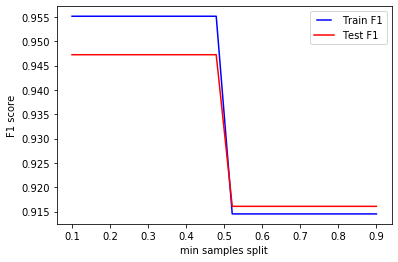

In [13]:
min_samples_splits = np.linspace(0.1, 0.9, 20, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(max_depth=4,min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   score_train = f1_score(y_train, train_pred)
   
   # Add auc score to previous train results
   train_results.append(score_train)

   y_pred = dt.predict(x_test)

   score_test = f1_score(y_test, y_pred)
   
   # Add auc score to previous test results
   test_results.append(score_test)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train F1")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test F1")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('F1 score')
plt.xlabel('min samples split')
plt.show()

In [14]:
print(min_samples_splits)
print(train_results)
print(test_results)
#0.49210526   ,min_samples_split=0.49210526

[0.1        0.14210526 0.18421053 0.22631579 0.26842105 0.31052632
 0.35263158 0.39473684 0.43684211 0.47894737 0.52105263 0.56315789
 0.60526316 0.64736842 0.68947368 0.73157895 0.77368421 0.81578947
 0.85789474 0.9       ]
[0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9551362683438156, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752]
[0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.94723458359822, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.91609195402

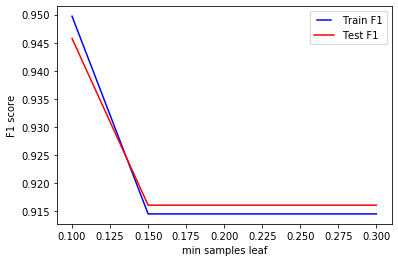

In [15]:
min_samples_leafs = np.linspace(0.1, 0.3, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(max_depth=4,min_samples_split=0.49210526,min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   score_train = f1_score(y_train, train_pred)
   
   # Add auc score to previous train results
   train_results.append(score_train)

   y_pred = dt.predict(x_test)

   score_test = f1_score(y_test, y_pred)
   
   # Add auc score to previous test results
   test_results.append(score_test)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train F1")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test F1")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('F1 score')
plt.xlabel('min samples leaf')
plt.show()


In [16]:
print(min_samples_leafs)
print(train_results)
print(test_results)
#0.13333333    min_samples_leaf=0.1 

[0.1  0.15 0.2  0.25 0.3 ]
[0.9497016197783461, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752, 0.9145347735455752]
[0.9457364341085271, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886, 0.9160919540229886]


# VERIFICO TUNEO DEL MODELO

In [17]:
dt = DecisionTreeClassifier(min_samples_split=0.49210526,min_samples_leaf=0.1 ,max_depth=4).fit(x_train, y_train)

evaluate(dt, x_train,y_train, x_test, y_test)

Entrenamiento: 95.8662%
Testeo: 95.5882%.
F1 Score:  0.9558823529411765
F1 Score default:  0.9457364341085271


In [18]:
#ESTA PREDICCION ME DA EN LA PRIMER COLUMNA LA PROBABILIDAD DE QUE SEA -1  
#EN LA SEGUNDA COLUMNA ME LA PROBABILIDAD QUE SEA 1 (QUE ES LA QUE ME INTERESA)
predict=dt.predict(to_predict)
predict

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

# GENERO EL SUBMIT

In [19]:
result = submission_output(ids, predict,"dtv1.csv")
result.head()

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,0
